In [45]:
import math
import serial
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

$\beta = \frac{\text{ln}(\frac{R_{T1}}{R_{T2}})}{(\frac{1}{T_1}-\frac{1}{T_2})}$

In [138]:
# Fat thermistor
r_ref_1 = 31.82*1000
r2 = 9.15*1000

t_ref_1 = 0.9 + 273.15
t2 = 25.5 + 273.15

b1 = math.log(r_ref_1/r2)/((1/t_ref_1)-(1/t2))
b1

4146.619162839309

In [139]:
# Small thermistor
r_ref_2 = 28.46*1000
r2 = 9.9*1000

t_ref_2 = 0.9 + 273.15
t2 = 25.5 + 273.15

b2 = math.log(r_ref_2/r2)/((1/t_ref_2)-(1/t2))
b2

3513.230743174254

$T(R) = \frac{1}{\frac{\text{ln}(\frac{R}{R_\text{ref}})}{\beta}+\frac{1}{T_{\text{ref}}}}$

$R(T) = R_{\text{ref}}e^{\beta(\frac{1}{T}-\frac{1}{T_{\text{ref}}})}$



In [147]:
def ohms2kel(r, b, r_ref, t_ref):
    return 1/(np.log(r/r_ref)/b + 1/(t_ref))

ohms2kel(7000, b1, r_ref_1, t_ref_1) - 273.15

31.374516331882546

In [141]:
ser = serial.Serial("/dev/ttyACM0", 9600, timeout=0.1)         # 1/timeout is the frequency at which the port is read

data_buffer = []
recording_time = 39 # s
start_time = time.time()

while True:
    curr_time = time.time()

    if curr_time - start_time > recording_time:
        break

    data = ser.readline().decode().strip()
    if data:
        data_buffer.append(int(data))

SerialException: [Errno 2] could not open port /dev/ttyACM0: [Errno 2] No such file or directory: '/dev/ttyACM0'

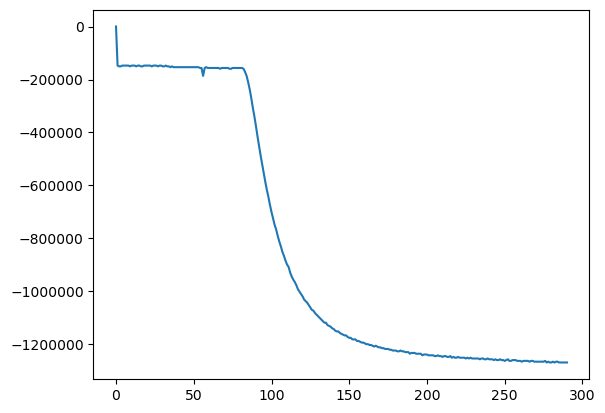

In [166]:
plt.plot(data_buffer)

In [80]:
#big_thermistor = np.array(data_buffer)
#small_thermistor = np.array(data_buffer)

In [167]:
#ohms2cel(volts2ohms(big_thermistor[900]/1000000), b1, r_ref_1, t_ref_1)

$R_x = -\frac{R(\frac{V_o}{V_i}+\frac{1}{2})}{(\frac{V_o}{V_i}+\frac{1}{2}) - 1}$

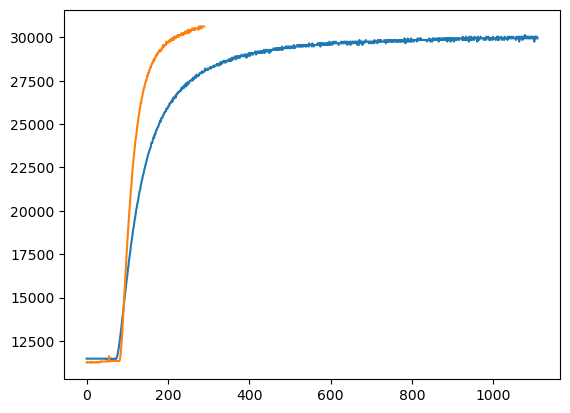

In [169]:
def volts2ohms(v_o):
    r = 10000
    v_i = 5

    a = -v_o/v_i + 1/2
    return -r*a/(a-1)

big_ohms = volts2ohms(big_thermistor[1:]/1000000)
small_ohms = volts2ohms(small_thermistor[1:]/1000000)
plt.plot(big_ohms)
plt.plot(small_ohms)

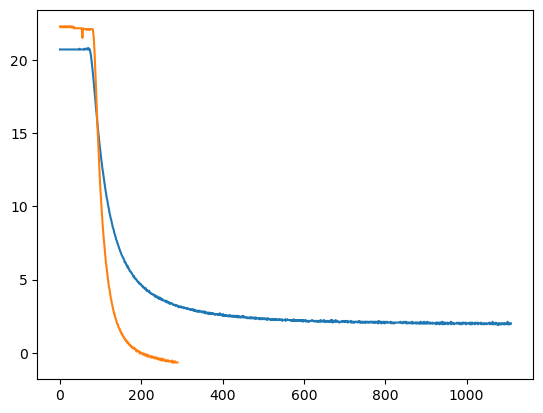

In [172]:
big_step = ohms2kel(big_ohms, b1, r_ref_1, t_ref_1)
small_step = ohms2kel(small_ohms, b2, r_ref_2, t_ref_2)
plt.plot(big_step - 273.15)
plt.plot(small_step - 273.15)

In [67]:
#df = pd.DataFrame(big_thermistor)
#df.to_csv("big_ice.csv")

In [173]:
#df = pd.DataFrame(small_thermistor)
#df.to_csv("small_ice.csv")

In [176]:
df = pd.DataFrame(big_step - 273.15)
df.to_csv("big_ice_temp.csv")
df = pd.DataFrame(small_step - 273.15)
df.to_csv("small_ice_temp.csv")

In [72]:
#pd.read_csv("test.csv")
#data_buffer